In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import geopy as gp
import pandas as pd
from urllib.request import urlretrieve
plt.style.use('seaborn')
%matplotlib inline

# import data and decide what features to use

In [42]:
sale = pd.read_excel('data/rollingsales_manhattan.xls', header=4)

In [308]:
sale.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE           

In [44]:
sale.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,4844809,2018-05-22
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,0,2018-05-23
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,,B1,113 AVENUE C,,...,2,0,2,1218,4764,1899,1,B1,0,2018-04-25
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,,C7,21-23 AVENUE B,,...,12,4,16,4186,10588,1900,2,C7,10350000,2018-09-07
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,,C1,200 EAST 7TH STREET,,...,18,0,18,2271,10650,1910,2,C1,5000000,2018-09-05


In [45]:
print('date range: ', sale['SALE DATE'].min(), sale['SALE DATE'].max())

date range:  2017-11-01 00:00:00 2018-10-31 00:00:00


In [46]:
sale.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

## use features: 
       ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE']
## unused:
'EASE-MENT', 'APARTMENT NUMBER', 

# obtain subway entrance shapefile

In [22]:
url = 'https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=Shapefile'
urlretrieve(url, 'sub_entrance.zip')

('sub_entrance.zip', <http.client.HTTPMessage at 0x11b3c9f60>)

In [23]:
import zipfile

In [25]:
sub = zipfile.ZipFile('sub_entrance.zip')

In [26]:
sub.extractall('data/')

In [31]:
for file in sub.namelist():
    if file.endswith('shp'):
        shp = file

In [34]:
sub = gpd.read_file('data/' + shp)

In [319]:
#sub.plot(figsize=(20,18))

In [39]:
sub.head()

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86835600032798 40.84916900104506)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821300022677 40.84912800131844)
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87349900050798 40.84122300105249)
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289199978331 40.84145300067447)
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962300013866 40.84081500075867)


# Geocoding

In [298]:
sale.shape

(16837, 21)

In [123]:
# drop the entries with 0 sale price
sale1 = sale.loc[sale['SALE PRICE'] != 0]

In [124]:
sale1.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE           

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [372]:
X = sale1.loc[:, ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
          'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE',
          'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 
          'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
          'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']]
y =sale1.loc[:, 'SALE PRICE']
X[['TAX CLASS AT TIME OF SALE', 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']] = X[['TAX CLASS AT TIME OF SALE', 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']].astype(str)

In [373]:
X.dtypes

NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                             object
LOT                               object
BUILDING CLASS AT PRESENT         object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                   int64
GROSS SQUARE FEET                  int64
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE         object
BUILDING CLASS AT TIME OF SALE    object
dtype: object

In [365]:
X.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,A4,189 EAST 7TH STREET,10009,1,0,1,987,2183,1860,1,A4
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,C7,21-23 AVENUE B,10009,12,4,16,4186,10588,1900,2,C7
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,C1,200 EAST 7TH STREET,10009,18,0,18,2271,10650,1910,2,C1
5,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,54,C3,203 EAST 7TH STREET,10009,4,0,4,1950,5446,2001,2,C3
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,390,64,C4,187 EAST 7TH STREET,10009,8,2,10,1642,5220,1910,2,C4


In [375]:
#try OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['TAX CLASS AT TIME OF SALE', 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'])], 
    remainder='passthrough')

## RF ussing OneHotEncoder


In [387]:
X_ohe = ct.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X_ohe, y, train_size=0.8, random_state=0)
# RF
rf4 = RandomForestRegressor(n_estimators=500, max_depth=30)
rf4.fit(xtrain, ytrain)

/Users/twwwy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [388]:
print('in-sample score: {}'.format(rf4.score(xtrain, ytrain)))
print('out-sample score: {}'.format(rf4.score(xtest, ytest)))

in-sample score: 0.9153264791188847
out-sample score: 0.8056882813948065


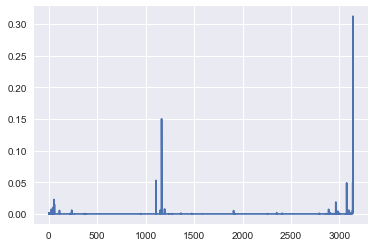

In [297]:
plt.plot(rf4.feature_importances_)

In [378]:
X_ohe.shape

(12991, 3142)

In [281]:
# visualization

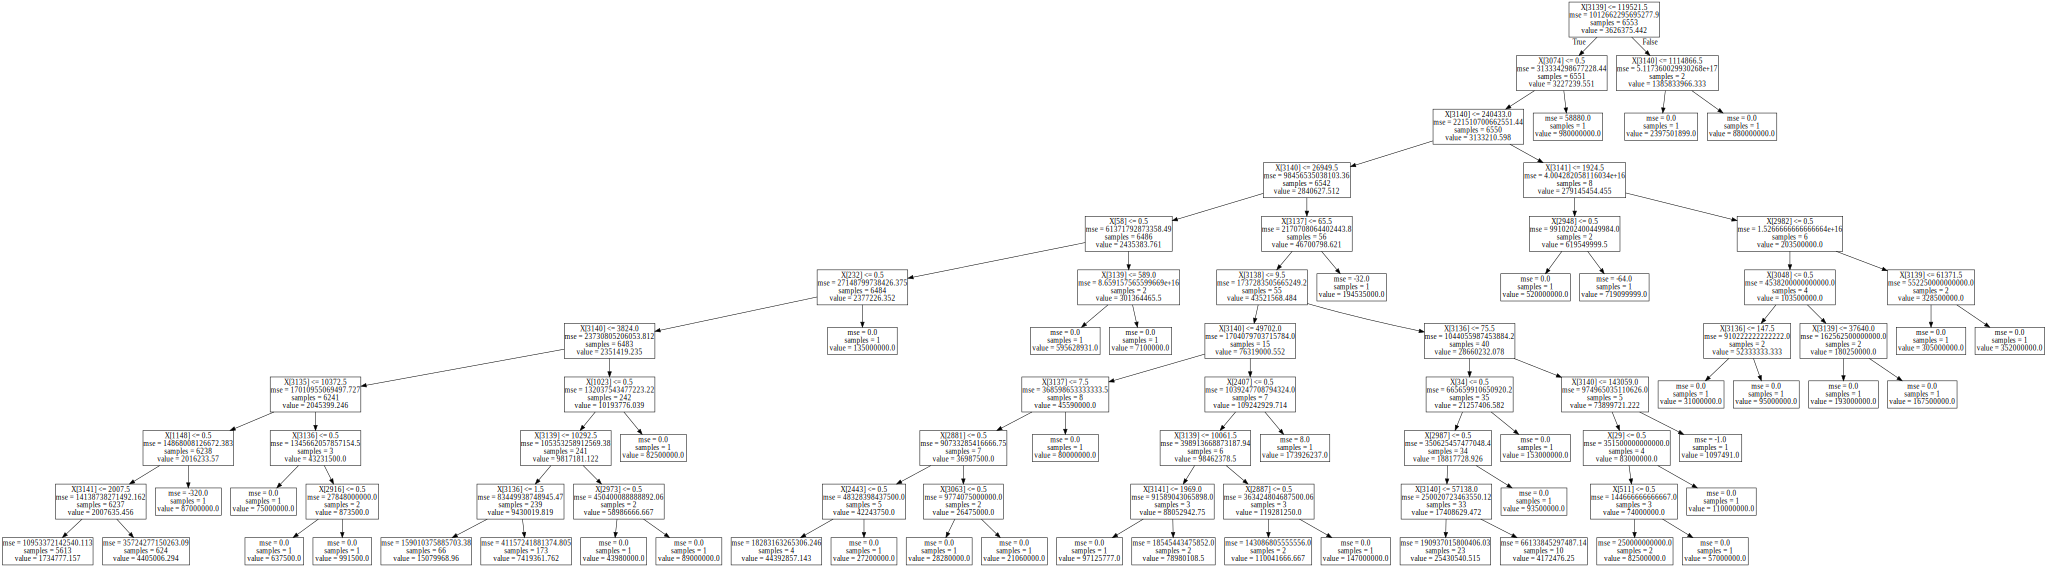

In [284]:
rf4_graph = export_graphviz(rf4.estimators_[99], out_file=None)
graph = graphviz.Source(rf4_graph)
graph

In [165]:
# normalize y
from sklearn.preprocessing import scale

In [167]:
y_nrm = scale(y)

/Users/twwwy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## RF using regular features

In [338]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# convert object type to int
for i in X.columns:
    if X[i].dtype == object:
        X[i] = le.fit_transform(X[i].astype(str))

In [341]:
# train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=0)
# RF
rf1 = RandomForestRegressor(n_estimators=100, max_depth=6)
rf1.fit(xtrain.values, ytrain.values)

/Users/twwwy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [342]:
print('in-sample score: {}'.format(rf1.score(xtrain, ytrain)))
print('out-sample score: {}'.format(rf1.score(xtest, ytest)))

in-sample score: 0.8308756246230213
out-sample score: 0.8222582794290221


Text(0.5, 1.0, 'Random Forest Model 1 Feature Importance')

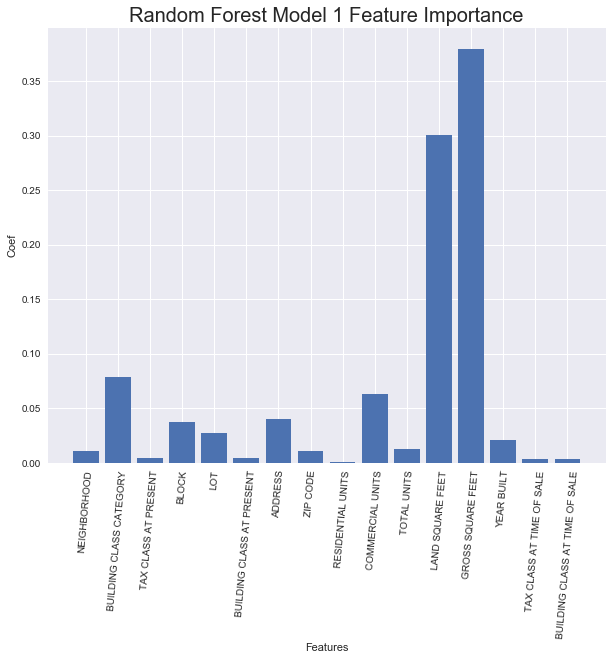

In [358]:
plt.figure(figsize=(10,8))
plt.bar(X.columns, rf1.feature_importances_)
plt.xticks(rotation=85)
plt.xlabel('Features')
plt.ylabel('Coef')
plt.title('Random Forest Model 1 Feature Importance', fontsize=20)

### **summary**: max_depth is optimized at 6

## RF using normalized y

In [194]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y_nrm, train_size=0.8, random_state=0)
# RF
rf3 = RandomForestRegressor(n_estimators=200, max_depth=5)
rf3.fit(xtrain.values, ytrain)

/Users/twwwy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [195]:
print('in-sample score: {}'.format(rf3.score(xtrain, ytrain)))
print('out-sample score: {}'.format(rf3.score(xtest, ytest)))

in-sample score: 0.8215529027708535
out-sample score: 0.826248934735105


### **summary**: using normalized y does not import the result

### Visualization

1. use export_graphviz

In [349]:
X.columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE'],
      dtype='object')

In [324]:
from sklearn.tree import export_graphviz

In [325]:
export_graphviz(rf1.estimators_[0], out_file='rf1.dot', feature_names=X.columns)

In [326]:
import graphviz

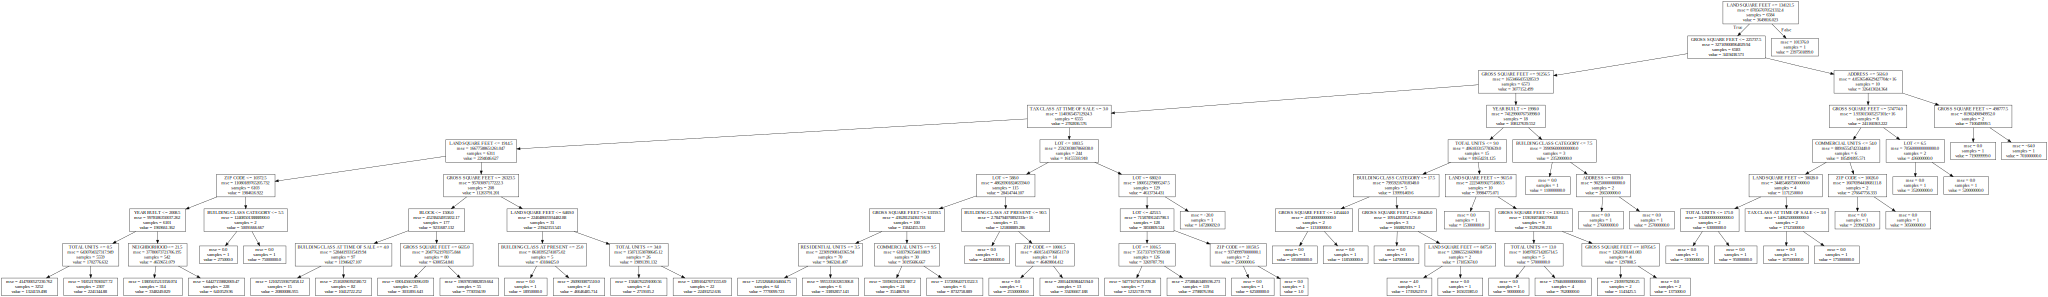

In [327]:
graphviz.Source.from_file('rf1.dot')

### **summary**: many categorical features are used as continuous features. I might need to use OneHotEncoder instead of 

2. use feature importance

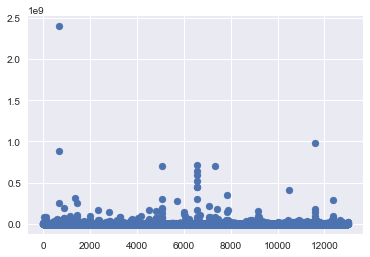

In [164]:
plt.scatter(range(len(y)), y)

## RF using PolynomialFeatures

In [133]:
from sklearn.preprocessing import PolynomialFeatures 

In [141]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
X_poly.shape

(12991, 969)

In [142]:
xtrain, xtest, ytrain, ytest = train_test_split(X_poly, y, train_size=0.8, random_state=0)
rf2 = RandomForestRegressor(n_estimators=100)
rf2.fit(xtrain, ytrain)

/Users/twwwy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [143]:
print('in-sample score: {}'.format(rf2.score(xtrain, ytrain)))
print('out-sample score: {}'.format(rf2.score(xtest, ytest)))

in-sample score: 0.9200804693906312
out-sample score: 0.7994913344985162


### **summary**: PolynomialFeatures does not improve the result